In [1]:
# this notebook is not focusing on machine learning
# Mainly aiming to understand some correlation plots, confusion matrix and a few visualizations

# author  : Enes Çavuş
# date    : July 2021
# subject : Practicing EDA 

# Note: Most of these steps are same with the other notebooks, that is why I did not commented any explanations
# check out my other ml notebooks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
redwine = pd.read_csv("datasets/winequality-red.csv", sep=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
redwine["quality"].value_counts(ascending=True)

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

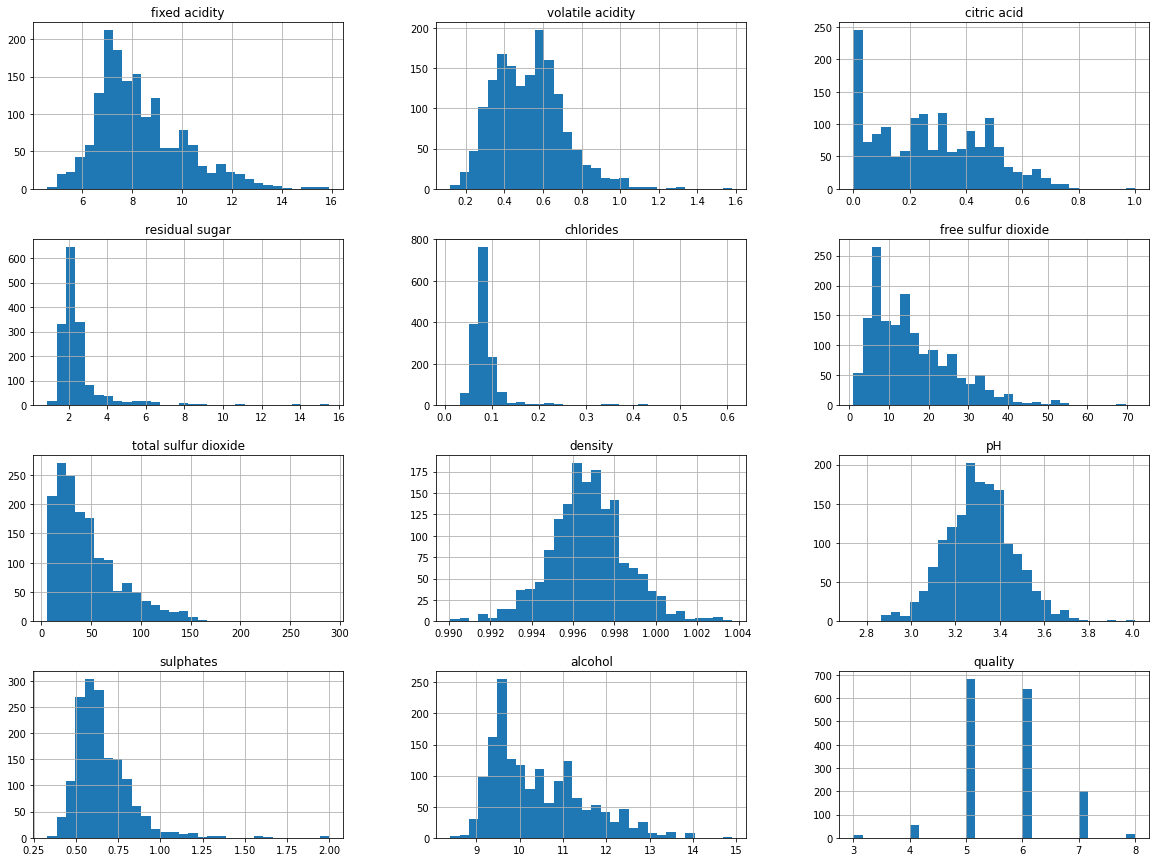

In [7]:
redwine.hist(bins=30,figsize=(20,15))
plt.show()

In [8]:
corr_matrix = redwine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [9]:
check_corr_pairplot = ["alcohol","sulphates","citric acid","fixed acidity","chlorides","density","total sulfur dioxide","volatile acidity","quality"]

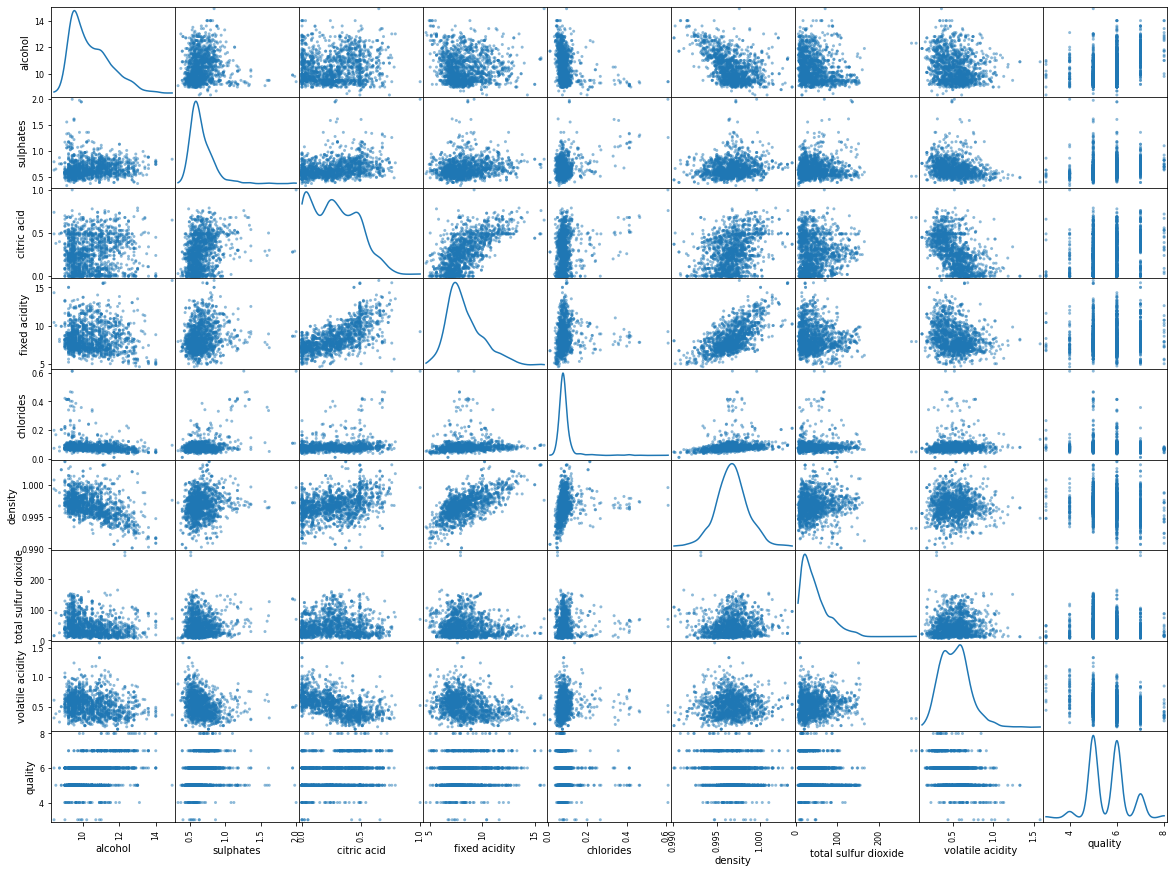

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(redwine[check_corr_pairplot], figsize=(20, 15),
              diagonal="kde")
plt.show()

In [11]:
reduced = redwine[check_corr_pairplot]
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               1599 non-null   float64
 1   sulphates             1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   fixed acidity         1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   density               1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   volatile acidity      1599 non-null   float64
 8   quality               1599 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 112.6 KB


In [12]:
reduced = reduced.sample(frac=1).reset_index(drop=True)
reduced

,alcohol,sulphates,citric acid,fixed acidity,chlorides,density,total sulfur dioxide,volatile acidity,quality
0,9.40,0.62,0.23,8.2,0.078,0.99760,104.0,0.56,5
1,10.60,0.61,0.65,13.0,0.093,0.99960,47.0,0.32,5
2,9.40,0.61,0.24,8.3,0.076,0.99760,112.0,0.54,5
3,11.40,0.54,0.17,6.2,0.073,0.99425,11.0,0.46,5
4,11.80,0.57,0.09,8.2,0.067,0.99418,10.0,0.74,6
...,...,...,...,...,...,...,...,...,...
1594,10.40,0.58,0.03,6.8,0.075,0.99545,31.0,0.64,6
1595,10.80,0.68,0.00,7.1,0.078,0.99522,44.0,0.59,6
1596,10.55,0.68,0.17,7.0,0.065,0.99514,24.0,0.56,7
1597,11.70,0.84,0.33,9.1,0.063,0.99516,27.0,0.29,7


In [13]:
X = reduced.iloc[:,:-1]
y = reduced["quality"]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test) 

In [16]:
x_train

array([[-0.30506807, -0.09852076,  0.20545961, ...,  0.80394959,
        -0.04364075, -0.6442238 ],
       [-1.25031473,  2.53841904,  2.12396098, ..., -0.09278139,
        -0.43950261, -0.24957887],
       [ 2.05804856, -0.85193213, -0.98712233, ..., -1.81151578,
        -0.92671721,  0.99073378],
       ...,
       [ 1.39637591, -0.41244216,  0.6721221 , ..., -2.95378025,
         3.61046874, -1.77178075],
       [ 1.01827724, -0.16130504, -1.24637927, ..., -0.88275869,
        -0.92671721,  1.21624517],
       [ 0.45112925, -0.47522645, -1.40193343, ..., -0.83471953,
        -0.98761904, -0.30595672]])

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Accuracy: 60.62499999999999
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.08      0.08      0.08        12
           5       0.66      0.70      0.68       138
           6       0.59      0.53      0.56       121
           7       0.74      0.69      0.71        45
           8       0.14      0.50      0.22         2

    accuracy                           0.61       320
   macro avg       0.37      0.42      0.38       320
weighted avg       0.61      0.61      0.61       320




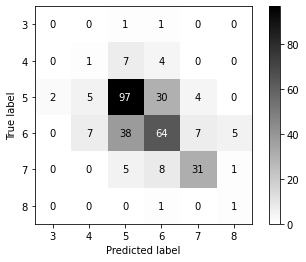

In [18]:
dt=DecisionTreeClassifier()

#train
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)

a = dt.score(x_test, y_test)

print("Accuracy:", a * 100)
print(classification_report(y_test, y_pred))

print()

cm_aaa = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(dt, x_test, y_test, cmap='binary')
plt.show()

In [19]:
print("Predictions:", dt.predict(x_test[:5]))

Predictions: [5 5 4 7 6]


In [20]:
print("Labels:", list(y_test[:5]))

Labels: [6, 6, 4, 7, 6]


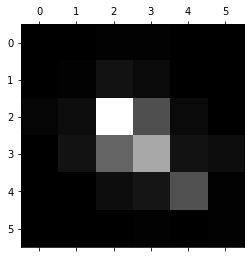

In [21]:
# a better way to visualize confision matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

In [22]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(dt, x_train, y_train, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[  1,   0,   4,   3,   0,   0],
       [  1,   4,  22,  12,   2,   0],
       [  3,  14, 353, 147,  25,   1],
       [  2,  15, 130, 285,  71,  14],
       [  0,   6,  10,  60,  72,   6],
       [  0,   0,   1,   6,   8,   1]])

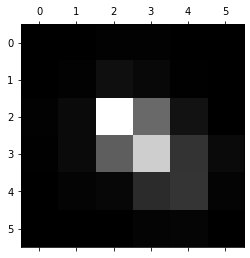

In [24]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [25]:
row_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sum

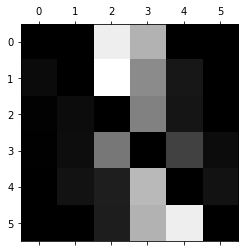

In [26]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray, fignum=0)
plt.show()

In [27]:
redwine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred=knn_clf.predict(x_test)

knn_clf_scores = knn_clf.score(x_test, y_test)

print("Accuracy:", knn_clf_scores * 100)
print(classification_report(y_test, y_pred))

knn_clf_conf_mx = confusion_matrix(y_test, y_pred)

Accuracy: 61.5625
              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00        12
           5       0.65      0.72      0.68       138
           6       0.57      0.60      0.59       121
           7       0.67      0.53      0.59        45
           8       0.00      0.00      0.00         2

    accuracy                           0.62       320
   macro avg       0.48      0.39      0.42       320
weighted avg       0.59      0.62      0.60       320



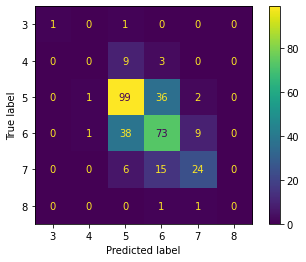

In [29]:
plot_confusion_matrix(knn_clf, x_test, y_test, cmap='viridis')
plt.show()

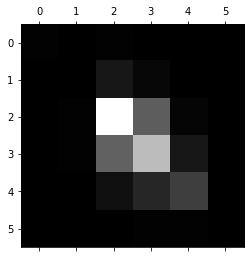

In [30]:
plt.matshow(knn_clf_conf_mx, cmap=plt.cm.gray)
plt.show()

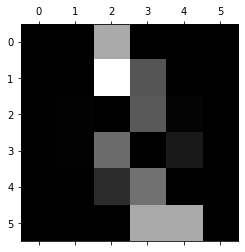

In [31]:
row_sum = knn_clf_conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = knn_clf_conf_mx / row_sum
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray, fignum=0)
plt.show()

In [32]:
# GridSearch Implemantations

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [34]:
parameters = [{
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
            'C': [1,2,3,300,500],
            'max_iter': [1000,100000]}]

In [35]:
clf = GridSearchCV(SVC(), parameters, scoring='accuracy')
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 2, 3, 300, 500],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'max_iter': [1000, 100000]}],
             scoring='accuracy')

In [36]:
clf.best_params_

{'C': 1, 'kernel': 'rbf', 'max_iter': 1000}

In [37]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   'C': [1, 2, 3, 300, 500],
   'max_iter': [1000, 100000]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [38]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

clf = clf.score(x_test, y_test)

print("Accuracy:", clf * 100)
print(classification_report(y_test, y_pred))

clf = confusion_matrix(y_test, y_pred)

Accuracy: 63.125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.67      0.79      0.72       138
           6       0.56      0.65      0.61       121
           7       0.82      0.31      0.45        45
           8       0.00      0.00      0.00         2

    accuracy                           0.63       320
   macro avg       0.34      0.29      0.30       320
weighted avg       0.62      0.63      0.60       320



___ENES ÇAVUŞ - Data EDA Practices___